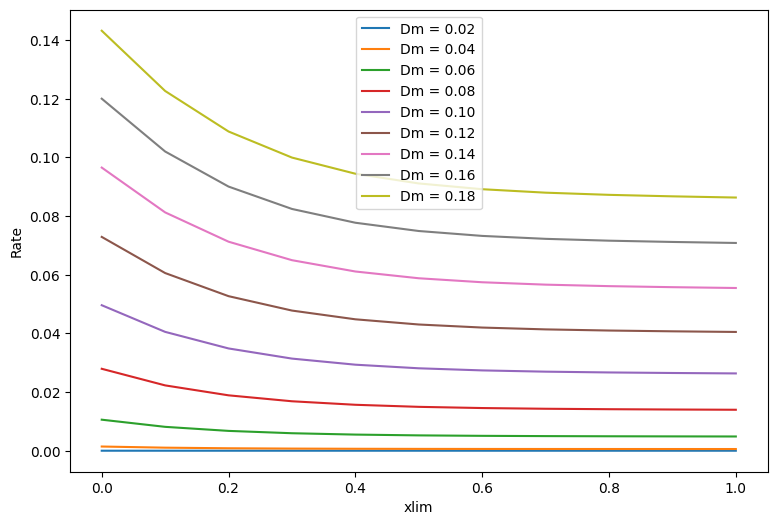

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def total(x, Dplus, Dminus):
    lower = -1
    n_steps = 120
        
    def V(x):
        a = 1
        b = 1
        return a*0.25*x**4 - b*0.5*x**2

    def func1(x):
        return np.exp(V(x)/Dminus)

    def func2(x):
        return np.exp(V(x)/Dplus)
    
    def func3(x):
        return np.exp(-V(x)/Dminus)

    def simple_sum(f, a, b, n):
        h = (b - a) / n
        result = 0.5 * (f(a) + f(b))
        for i in range(1, n):
            x = a + i * h
            result += f(x)
        result *= h
        return result

    def first(x):
        c = Dminus / simple_sum(func3, lower, 0, n_steps)
        #c = np.sqrt(Dminus*2)/np.sqrt(2*np.pi)
        #c = np.sqrt(2) / np.sqrt(2*np.pi*Dminus)
        d = 1/(simple_sum(func1, lower, 0, n_steps) + simple_sum(func2, 0, x, n_steps))
        #d = 1/((1/Dminus)*simple_sum(func1, lower, 0, n_steps) + (1/Dplus)*simple_sum(func2, 0, x, n_steps))
        return c * d
    
    return first(x)

def calculate_gamma(any, ans, any2):

    x = np.log(any)
    y = np.log(ans)

    gamma, intercept = np.polyfit(x, y, 1)

    print(f"{any2:1f} \t {gamma:3f}")
    return gamma

# Parameters
Dplus = 0.08
Dm_val = np.arange(0.02, 0.20, 0.02)
x_val = np.arange(0.0, 1.1, 0.1)

plt.figure(figsize=(9, 6))

results = []

for Dm in Dm_val:
    ans = np.array([total(xlim, Dplus, Dm) for xlim in x_val])
    results.append(ans)
    
    #gamma = calculate_gamma(Dm_val, ans, xlim)
    
    plt.plot(x_val, ans, label=f'Dm = {Dm:.2f}')
    
results_array = np.column_stack(results)
#np.savetxt('E:\\Samudro\\Mine\\PhD_Work\\Work\\Rate_MFPT\\Normal_bistable\\Smoluchowski\\R_vs_xlim\\Dp_const\\Dp_006.txt', np.column_stack([x_val, results_array]), fmt='%f', delimiter='\t', header='x_val\t' + '\t'.join(map(str, Dm_val)), comments='')
#print("Results saved to 'results.txt'")

plt.xlabel("xlim")
plt.ylabel("Rate")
plt.legend()
plt.show()
